<img align="right" width="200" height="200" src="https://static.wikia.nocookie.net/lego/images/2/23/PPG_logo.png"> 

# <span style="color:#EF7C8E">Intermediate - KMeans assignments - Machine Learning </span>
 


## <span style="color:#55BB99"> By: Wejdan Al-Ahmadi</span>
<hr style="border:2px solid gray"> </hr>

## <span style="color:#726060">Objectives:</span>

* All the libraries you need have been imported for you
* Work through at least 2 of preloaded datasets and:
* Standardize your Data
* Create Elbow Plot to Determine Clusters
* Apply KMeans
* Plot your clusters including the centroid for each of your clusters defined by KMeans
    * Plot each cluster with a different cluster to make it easier to read
* Determine Accuracy Score if true labels are known

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random


from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

<center><H1>KMeans Clustering</H1></center>

<p align="center">
  <img width="400" height="350" src="https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif">
</p>


### Steps

**All the libraries you need have been imported for you**

**Work through at least 2 of preloaded datasets and:**
- [Standardize your Data](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- Create Elbow Plot to Determine Clusters
- Apply [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- Plot Results of Actual Results Compared to KMeans Cluster Labels
- Determine Accuracy Score if true labels are known

### 🧞‍♂️BONUS🧞‍♀️
- Complete all 3 preloaded datasets

#### Dog Horse KMeans Challenge

In [2]:
# Import Data
df_dh = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/dog_or_horse.csv")
df_dh.sample(3)

height  weight  target   type
175    83.0   104.0     1.0  horse
95     37.0   109.0     0.0    dog
170    74.0   155.0     1.0  horse

In [3]:
# Scale Data
df_dh_copy = df_dh.copy()
#select needed columns 
df_dh_copy = df_dh_copy[['height', 'weight']] 

# Scale Data
# Instantiate Scaler Object
scaler = StandardScaler()

# Apply to X data
df_dh_copy_scaled = scaler.fit_transform(df_dh_copy)


C:\Users\wejda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


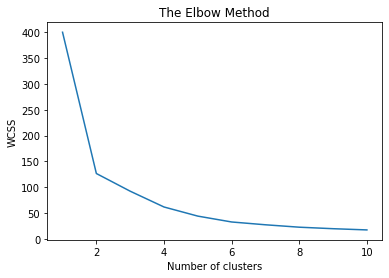

In [4]:
# Create Elbow Plot
X = df_dh_copy_scaled
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [5]:
# Apply KMeans and Plot KMeans Results and Actual Results

kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 123)

y_kmeans = kmeans.fit_predict(X)

print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0]


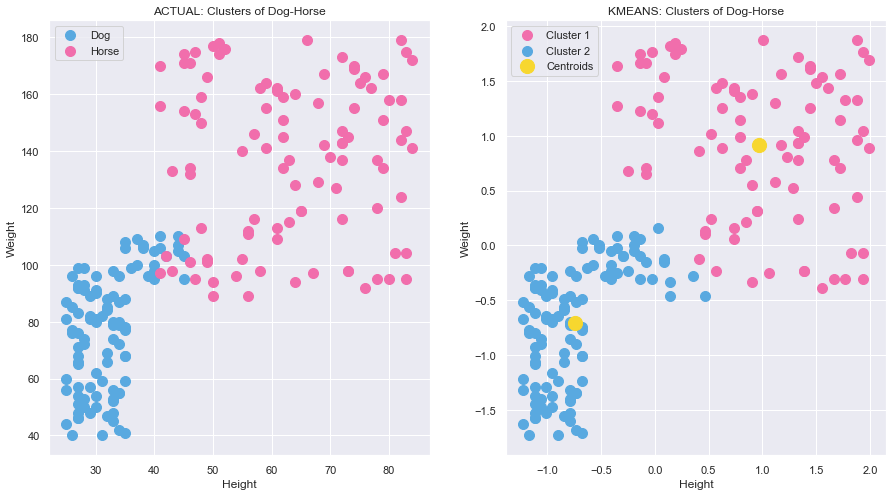

In [15]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid") # set a theme

plt.subplot(1, 2, 1) # (left)
plt.scatter(df_dh.loc[(df_dh['type'] == "dog"), 'height'], df_dh.loc[(df_dh['type'] == "dog"), 'weight'], s = 100, c = '#59A9E0', label = 'Dog')
plt.scatter(df_dh.loc[(df_dh['type'] == "horse"), 'height'], df_dh.loc[(df_dh['type'] == "horse"), 'weight'], s = 100, c = '#F16EAC', label = 'Horse')

plt.title('ACTUAL: Clusters of Dog-Horse')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()

plt.subplot(1, 2, 2) # (right)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = '#F16EAC', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = '#59A9E0', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = '#F7D72F', label = 'Centroids')
plt.title('KMEANS: Clusters of Dog-Horse')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()

plt.show()

In [7]:
# Compute Accuracy Score of KMean Labels with True Labels
df_dh_new = df_dh.copy()
dog_horse={"dog":1, "horse":0}
df_dh_new = df_dh_new.replace({"type": dog_horse})
print("Accuracy:",round(accuracy_score(df_dh_new['type'],y_kmeans)*100,2),"%")

Accuracy: 93.5 %


In [ ]:
# *NOTE*: The kmeans clustering represented the dogs with 1 and the horses with 0, but the target value had the opposite
# therefore I switched the dog to 1's and the horses to 0's to accomodate this. 

#### Seattle Weather KMeans Challenge

In [8]:
df_sea = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/seattle_weather_1948-2017.csv")
df_sea.sample(3)

ds  prcp  tmax  tmin   rain
19058  2000-03-06  0.00    47    32  False
24641  2015-06-19  0.02    75    56   True
14907  1988-10-24  0.00    62    46  False

In [9]:
df_sea.dropna(inplace=True)

In [10]:
# Scale Data
df_sea_copy = df_sea.copy()
#select needed columns 
df_sea_copy = df_sea_copy[['prcp', 'tmax']] 

# Scale Data
# Instantiate Scaler Object
scaler = StandardScaler()

# Apply to X data
df_sea_copy_scaled = scaler.fit_transform(df_sea_copy)

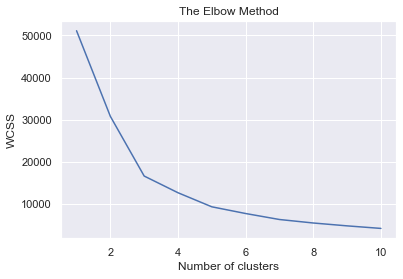

In [11]:
# Create Elbow Plot
X2 = df_sea_copy_scaled

wcss2 = []

for i in range(1, 11):
    kmeans2 = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans2.fit(X2)
    wcss2.append(kmeans2.inertia_)
    
plt.plot(range(1, 11), wcss2)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
# Apply KMeans and Plot KMeans Results and Actual Results

kmeans2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 123)

y_kmeans2 = kmeans2.fit_predict(X2)

print(y_kmeans2)

[0 0 0 ... 0 0 0]


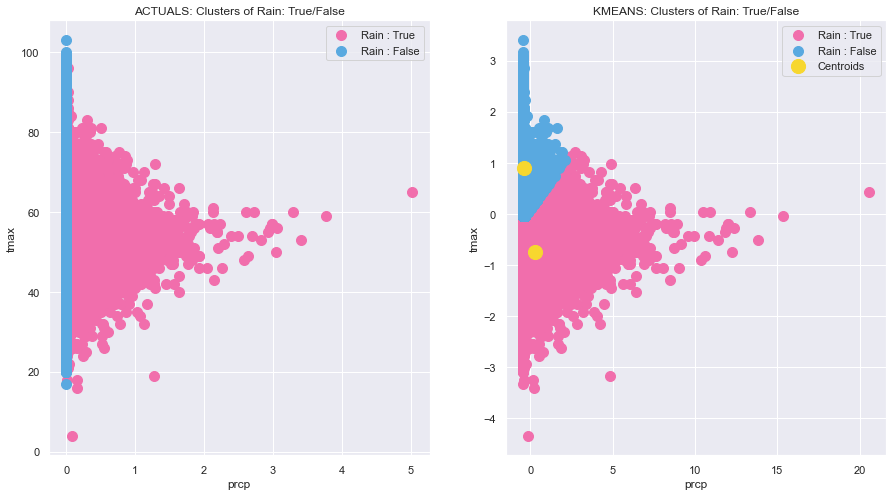

In [16]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid") # set a theme

plt.subplot(1, 2, 1) # (left)
plt.scatter(df_sea.loc[(df_sea['rain'] == True), 'prcp'], df_sea.loc[(df_sea['rain'] == True), 'tmax'], s = 100, c = '#F16EAC', label = 'Rain : True')
plt.scatter(df_sea.loc[(df_sea['rain'] == False), 'prcp'], df_sea.loc[(df_sea['rain'] == False), 'tmax'], s = 100, c = '#59A9E0', label = 'Rain : False')

plt.title('ACTUALS: Clusters of Rain: True/False')
plt.xlabel('prcp')
plt.ylabel('tmax')
plt.legend()

plt.subplot(1, 2, 2) # (right)
plt.scatter(X2[y_kmeans2 == 0, 0], X2[y_kmeans2 == 0, 1], s = 100, c = '#F16EAC', label = 'Rain : True')
plt.scatter(X2[y_kmeans2 == 1, 0], X2[y_kmeans2 == 1, 1], s = 100, c = '#59A9E0', label = 'Rain : False')

plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s = 200, c = '#F7D72F', label = 'Centroids')
plt.title('KMEANS: Clusters of Rain: True/False')
plt.xlabel('prcp')
plt.ylabel('tmax')
plt.legend()

plt.show()

In [14]:
# Compute Accuracy Score of KMean Labels with True Labels
df_sea_new = df_sea.copy()
rain_dict={True:0, False:1}
df_sea_new = df_sea_new.replace({"rain": rain_dict})
print("Accuracy: ",round(accuracy_score(df_sea_new['rain'],y_kmeans2)*100,2),"%")

Accuracy:  71.72 %


In [ ]:
# note that when using the tmax, my true rain predictions turned out to be represented by 0's and my false rain predictions
# were represented by 1's in the kmeans, so I changed the colors and the values of the rain column to match it.